<a href="https://colab.research.google.com/github/tanus-jain/Redefine-Final-Project/blob/main/TANU_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Final Project**
*Date due: August 07, 2020 at 11:59pm PT*

*Authored by: Redefine Course Instructors and Tanushree Jain*


In [ ]:
# Include all your imports in this cell
import pandas as pd

In [ ]:
# REPLACE 'URL HERE' with the url to your chosen dataset
!wget https://raw.githubusercontent.com/redefine-cs/redefine-cs.github.io/master/resources/environment.csv

--2020-08-08 17:04:34--  https://raw.githubusercontent.com/redefine-cs/redefine-cs.github.io/master/resources/environment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23386 (23K) [text/plain]
Saving to: ‘environment.csv.1’

environment.csv.1   100%[===================>]  22.84K  --.-KB/s    in 0.007s  

2020-08-08 17:04:34 (3.09 MB/s) - ‘environment.csv.1’ saved [23386/23386]



In [ ]:
# REPLACE 'file_name.csv' below with the name of your file as a string
# your options are: 'music.csv', 'movies.csv', 'environment.csv', 'education.csv', 'covid.csv'
file_name = 'environment.csv'
environment = pd.read_csv(file_name)

In [ ]:
# This is your data as a pandas dataframe, feel free to rename data to something else if you prefer
environment

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


# Analyze Data

The first step that I wanted to do was clean up the data. This consisted of a few different parts. Initially, I got rid of the "Months", "MEI", "TSI", and "Aerosols" columns, as those were irrelevant to what I was looking for. 

In [ ]:
# Part 1: Delete Unnecessary Information

# Only get the yearly data (delete the months)
environment = environment.drop(['Month', 'MEI', 'TSI', 'Aerosols'], axis = 'columns')

environment

,Year,CO2,CH4,N2O,CFC-11,CFC-12,Temp
0,1983,345.96,1638.59,303.677,191.324,350.113,0.109
1,1983,345.52,1633.71,303.746,192.057,351.848,0.118
2,1983,344.15,1633.22,303.795,192.818,353.725,0.137
3,1983,342.25,1631.35,303.839,193.602,355.633,0.176
4,1983,340.17,1648.40,303.901,194.392,357.465,0.149
...,...,...,...,...,...,...,...
303,2008,384.15,1779.88,321.405,244.200,535.072,0.407
304,2008,383.09,1795.08,321.529,244.083,535.048,0.378
305,2008,382.99,1814.18,321.796,244.080,534.927,0.440
306,2008,384.13,1812.37,322.013,244.225,534.906,0.394


The next step in cleaning up the data was combing the data in each column by year. Basically, I wanted to find the average atmospheric concentration for the different molecules per year. 

In [ ]:
# Part 2: Condense Data 

# Combine data according to yearly averages 

environment = pd.DataFrame(environment.groupby(["Year"], as_index=False).mean())

environment

,Year,CO2,CH4,N2O,CFC-11,CFC-12,Temp
0,1983,342.868750,1645.200000,303.880250,193.986750,356.361250,0.136500
1,1984,344.580000,1656.119167,304.702333,201.166833,367.793833,-0.018667
2,1985,346.041667,1668.886667,305.239750,212.858167,383.306750,-0.037083
3,1986,347.384167,1682.555833,306.449583,223.766250,402.760083,0.034083
4,1987,349.160833,1693.730000,306.055167,234.715250,423.272917,0.177833
5,1988,351.563333,1704.554167,306.722000,246.949167,447.629083,0.174500
6,1989,353.067500,1718.470833,307.889917,255.194167,466.762417,0.109500
7,1990,354.348333,1731.393333,308.704333,261.981083,481.672917,0.247500
8,1991,355.566667,1740.909167,309.374250,266.566583,493.443417,0.203500
9,1992,356.382500,1745.423333,309.936917,269.454333,505.308250,0.070917


The next part of my project was graph the data. 

Text(0.5, 1.0, 'Temperature Over the Years')

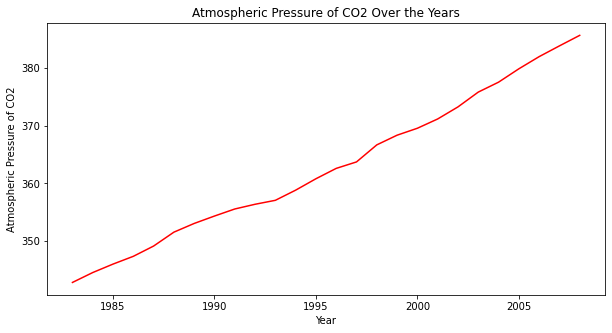

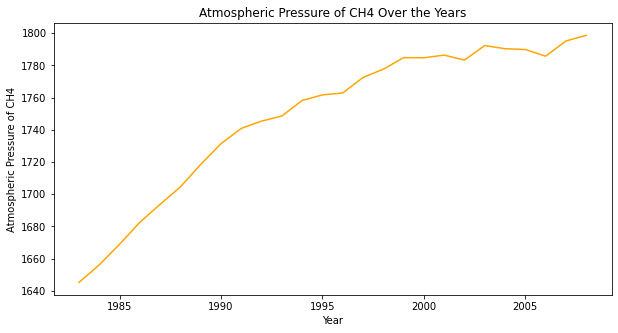

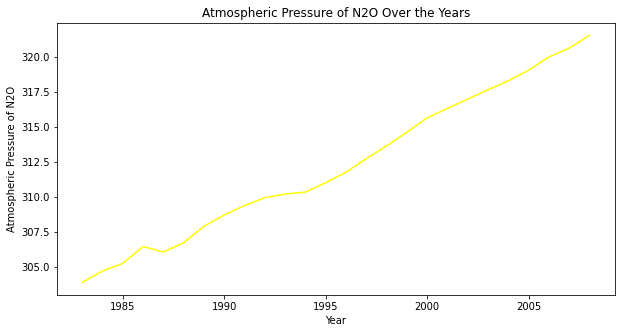

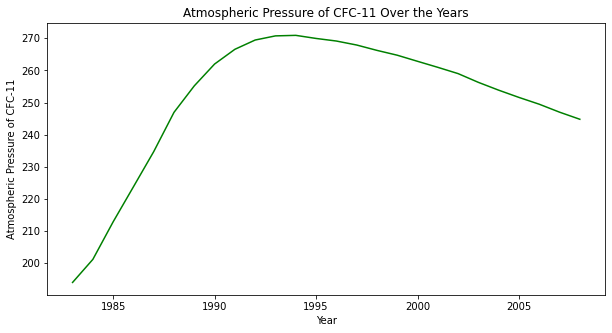

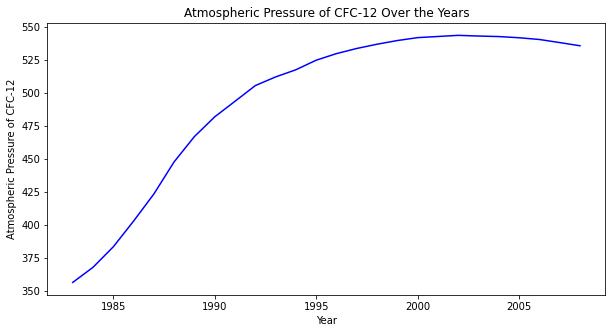

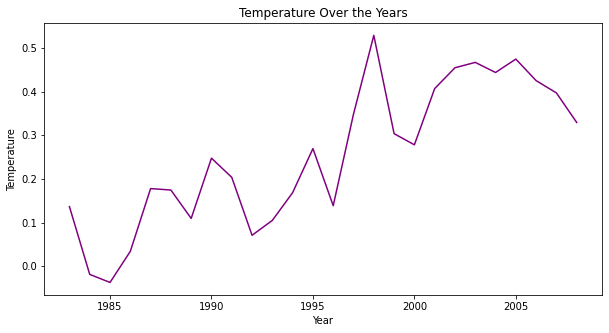

In [ ]:
import matplotlib.pyplot as plt

environment_CO2 = environment.plot(x="Year", y="CO2", legend=False, figsize=(10,5), color="red"); # Settings for legend, coloring, plot size
plt.xlabel("Year");
plt.ylabel("Atmospheric Pressure of CO2");
plt.title("Atmospheric Pressure of CO2 Over the Years")

environment_CH4 = environment.plot(x="Year", y="CH4", legend=False, figsize=(10,5), color="orange"); # Settings for legend, coloring, plot size
plt.xlabel("Year");
plt.ylabel("Atmospheric Pressure of CH4");
plt.title("Atmospheric Pressure of CH4 Over the Years")

environment_N2O = environment.plot(x="Year", y="N2O", legend=False, figsize=(10,5), color="yellow"); # Settings for legend, coloring, plot size
plt.xlabel("Year");
plt.ylabel("Atmospheric Pressure of N2O");
plt.title("Atmospheric Pressure of N2O Over the Years")

environment_CFC11 = environment.plot(x="Year", y="CFC-11", legend=False, figsize=(10,5), color="green"); # Settings for legend, coloring, plot size
plt.xlabel("Year");
plt.ylabel("Atmospheric Pressure of CFC-11");
plt.title("Atmospheric Pressure of CFC-11 Over the Years")

environment_CFC12 = environment.plot(x="Year", y="CFC-12", legend=False, figsize=(10,5), color="blue"); # Settings for legend, coloring, plot size
plt.xlabel("Year");
plt.ylabel("Atmospheric Pressure of CFC-12");
plt.title("Atmospheric Pressure of CFC-12 Over the Years")

environment_temp = environment.plot(x="Year", y="Temp", legend=False, figsize=(10,5), color="purple"); # Settings for legend, coloring, plot size
plt.xlabel("Year");
plt.ylabel("Temperature");
plt.title("Temperature Over the Years")

This is the predication value of N2O Emissions for year 2021 [[333.68447901]]
The r-value for this prediction model is 0.9961917523490317


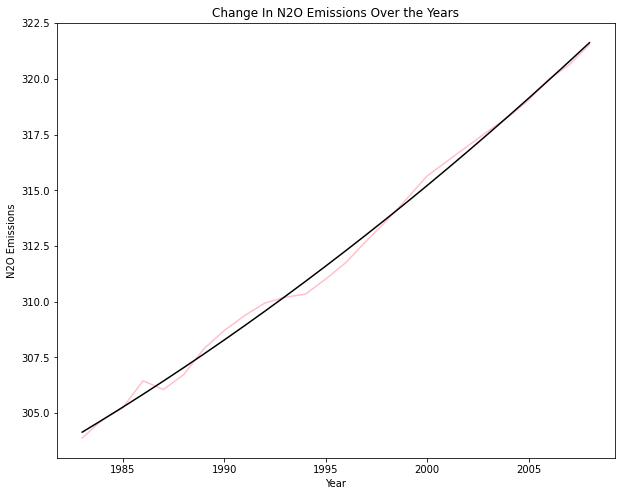

In [ ]:
# Predict Values for the Future

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

co2 = [1, "CO2 Emissions"]
ch4 = [2, "CH4 Emissions"]
n2o = [3, "N2O Emissions"]
cfc11 = [4, "CFC-11 Emissions"]
cfc12 = [5, "CFC-12 Emissions"]
temper = [6, "Temperature"]

# change the following to get different results!!  
setting = n2o
future = 2021

x = environment.iloc[:, 0].values.reshape(-1, 1)  # get all the values for the years
y = environment.iloc[:, setting[0]].values.reshape(-1, 1)  # get all the values for the corresponding column

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
y_pred = lin_reg.predict(x_poly) # need to go back to linear regression because you cannot predict with poly_reg
plt.figure(figsize=(10,8));
plt.plot(x, y, "#FFC0CB"); # actual graph
plt.plot(x, y_pred, "black"); # polynomial regression model
plt.xlabel("Year");
plt.ylabel(str(setting[1]));
plt.title("Change In " + str(setting[1]) + " Over the Years")

print("This is the predication value of " + str(setting[1]) + " for year " + str(future) + " " + str(lin_reg.predict(poly_reg.fit_transform([[future]]))))
print("The r-value for this prediction model is " + str(r2_score(y, y_pred))) # essentially how accurate the data is --> the r^2 value for the model (closer to 1)